In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.cm as cm
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

In [2]:
def categorise(row):  
    if row['label'] == 0:
        return 1
    elif row['label'] == 1:
        return 2
    elif row['label'] == 2:
        return 0
    elif row['label'] == 3:
        return 3
    elif row['label'] == 4:
        return 4
    return 5

In [3]:
data = pd.read_csv("2Dtest_PM.csv")
data = data.drop(columns = 'Unnamed: 0')
data['label'] = data.apply(lambda row: categorise(row), axis=1)
data.head()

,eco2,ethanol,h2,pm10,pm100,pm25,rh,temp,voc,label,Datetime
0,634,18727,12998,5,7,6,51,25,288,0,"2022-05-01,04:29:20"
1,606,18710,13023,5,7,7,51,25,296,0,"2022-05-01,04:30:13"
2,715,18732,12936,6,8,8,51,25,279,0,"2022-05-01,04:31:00"
3,699,18690,12948,5,6,6,51,25,311,0,"2022-05-01,04:32:00"
4,695,18737,12958,5,6,6,51,25,273,0,"2022-05-01,04:33:00"


In [4]:
for i in range(len(data)):
    a = data["Datetime"][i]
    data["Datetime"][i] = a[0:10]+" "+a[11:19]

data["Datetime_one"] = data["Datetime"]
for i in range(len(data)):
    a = data["Datetime"][i]
    data["Datetime_one"][i] = a[0:10]+"\n"+a[11:19]

C:\Users\ivan8\AppData\Local\Temp\ipykernel_1512\369309208.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Datetime"][i] = a[0:10]+" "+a[11:19]
C:\Users\ivan8\AppData\Local\Temp\ipykernel_1512\369309208.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Datetime_one"][i] = a[0:10]+"\n"+a[11:19]


In [5]:
def plot_image(axs,data,col,yfilter_max,yfilter_min):
    
    fontsize_label = 50
    fontsize_title = 80
    
    x = np.arange(len(data))
    y = data.iloc[:,[col]].squeeze()
    #y = data["voc"]
    dydx = data["label"]
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    
    #cmap = ListedColormap(['blue','orange','green','red','purple','brown'])
    #a = cm.get_cmap('Blues', 20)
    #cmap = ListedColormap([a(0.3),a(0.45),a(0.6),a(0.75),'purple','brown'])
    cmap = ListedColormap(['pink','red','orange','yellow','purple','brown'])
    norm = BoundaryNorm([0,1,2,3,4,5,6], cmap.N)
    lc = LineCollection(segments, cmap=cmap, norm=norm ,linewidths = 0.1)
    lc.set_array(dydx)
    lc.set_linewidth(2)
    line = axs.add_collection(lc)
    cbar = fig.colorbar(line, ax=axs)
    cbar.ax.tick_params(labelsize=fontsize_label)
    
    axs.set_xlim(x.min(), x.max())
    #'%y-%m-%d %H:%M:%s'
    time = pd.to_datetime(data["Datetime"])
    axs.set_xticks(x)
    axs.set_xticklabels(data["Datetime_one"], rotation=45,fontsize=fontsize_label)
    tick_spacing = int(time.index.size/5) # x軸密集度
    axs.xaxis.set_major_locator(mticker.MultipleLocator(tick_spacing))

    
    if(yfilter_max == 0):
        ymax = y.max()
    else:
        ymax = yfilter_max
    
    if(yfilter_min == 0):
        ymin = y.min()
    else:
        ymin = yfilter_min
    
    new_yticks = np.linspace(ymin, ymax, 5)
    axs.set_yticks(new_yticks)
    axs.set_yticklabels(new_yticks,fontsize=fontsize_label)
    axs.set_ylim(ymin, ymax)

    axs.set_title("%s\n"%(data.columns[col]),fontsize=fontsize_title)
    axs.set_xlabel('datetime\n\n\n\n\n\n\n',fontsize=fontsize_label)
    axs.set_ylabel("%s"%(data.columns[col]),fontsize=fontsize_label)
    
    axs.grid() 

In [6]:
def clean_axis(axs):
    axs.axis('off')

def clean_all_axis(axs,a,b):
    for i in range(0,a):
        for j in range(0,b):
            axs[i,j].axis('off')

In [7]:
def enter_time_segment(data):
    '''
    date_start = input("Please enter the begining and the end of the date,date type example:2022-05-01 04:29:00\nEnter range:2022-05-01 04:29:00 to 2022-05-17 03:14:00\nEnter a begining of date: ")
    date_end = input("Enter a end of date: ")
    print("the segment of the date is from %s to %s"%(date_start,date_end) )
    '''
   # a[0:10]+" "+a[11:19]
    datein = input("Enter the start and the end of date:")
    date_start = datein[0:19]
    date_end = datein[20:39]
    print("the segment of the date is from %s to %s"%(date_start,date_end) )
    
    struct_time_start = time.strptime(date_start, "%Y-%m-%d %H:%M:%S")
    time_stamp_start = int(time.mktime(struct_time_start))

    struct_time_end = time.strptime(date_end, "%Y-%m-%d %H:%M:%S")
    time_stamp_end = int(time.mktime(struct_time_end))
    
    
    for i in range(len(data)):
        tempstart = 0
        struct_time = time.strptime(data['Datetime'].iloc[i], "%Y-%m-%d %H:%M:%S")
        time_stamp = int(time.mktime(struct_time))

        if(time_stamp_start == time_stamp):
            start = data['Datetime'].iloc[i]
            tempstart = i
            break
        elif(time_stamp_start < time_stamp):
            if(i != 0):
                start = data['Datetime'].iloc[i]
                tempstart = i
            elif(i == 0):
                start = data['Datetime'].iloc[0]
                tempstart = i  
            break

        
    for i in range(len(data)):
        tempend = 0
        struct_time = time.strptime(data['Datetime'].iloc[i], "%Y-%m-%d %H:%M:%S")
        time_stamp = int(time.mktime(struct_time))

        if(time_stamp_end == time_stamp):
            end = data['Datetime'].iloc[i]
            tempend = i
            break
        elif(time_stamp_end < time_stamp):
            end = data['Datetime'].iloc[i-1]
            tempend = i-1
            break
        elif(i == len(data)-1):
            end = data['Datetime'].iloc[-1]
            tempend = i 
            print('Hiiii')
            break
    print("the segment of the date is from %s(%d) to %s(%d)"%(start,tempstart,end,tempend) )
    #print("the number the date is %d"%(tempend-tempstart+1) )
    data_seg = data[tempstart:tempend+1]
    
    return data_seg

In [8]:
#2022-05-XX 00:00:00 to 2022-05-XX 23:59:59
#2022-05-06 00:00:00 2022-05-08 23:59:59
#2022-05-09 00:00:00 2022-05-10 23:59:59
#2022-05-11 00:00:00 2022-05-12 23:59:59

In [21]:
data_seg = enter_time_segment(data)

Enter the start and the end of date:2022-05-06 00:00:00 2022-05-08 23:59:59
the segment of the date is from 2022-05-06 00:00:00 to 2022-05-08 23:59:59
the segment of the date is from 2022-05-06 00:00:01(6930) to 2022-05-08 23:59:00(11249)


C:\Users\ivan8\AppData\Local\Temp\ipykernel_1512\4208308537.py:48: UserWarning: Attempting to set identical bottom == top == 25 results in singular transformations; automatically expanding.
  axs.set_ylim(ymin, ymax)


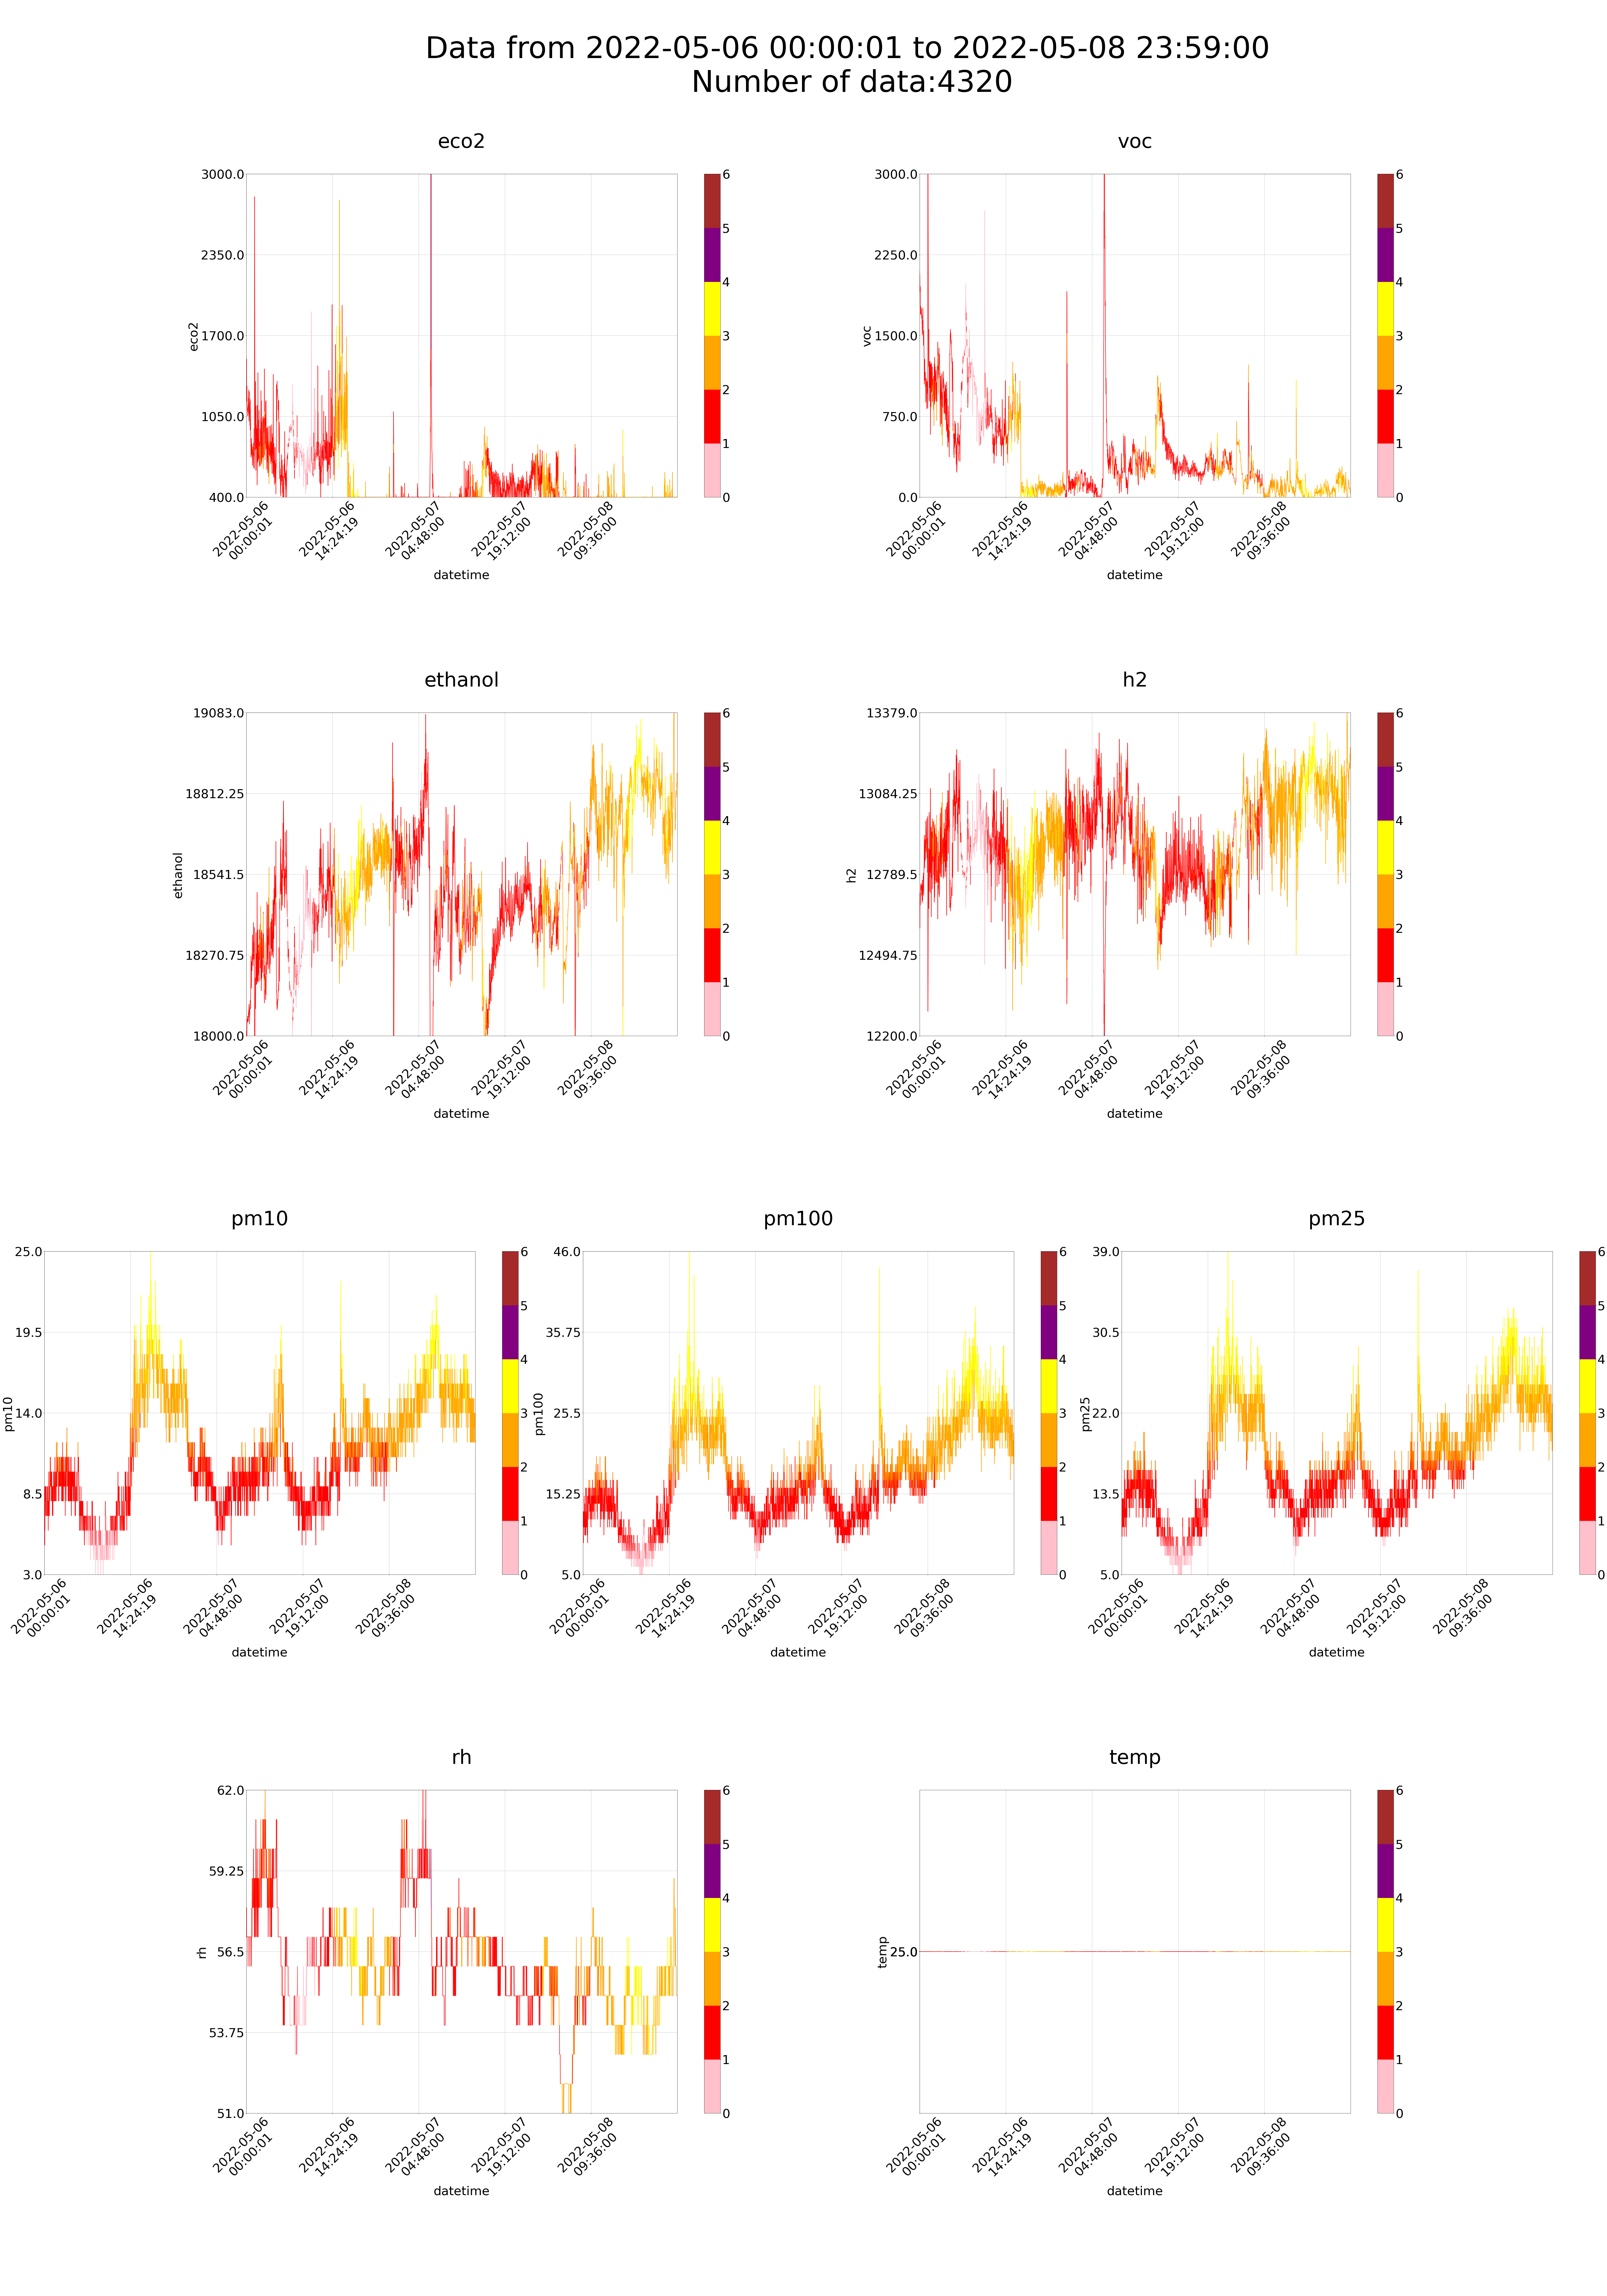

In [15]:
#2022-05-06 00:00:00 2022-05-08 23:59:59
fig, axs = plt.subplots(4,3,sharex=False,figsize=(90,120),dpi = 60)
fig.patch.set_facecolor('white') # set background color to white
fig.suptitle("\nData from %s to %s \nNumber of data:%d\n\n"%(data_seg['Datetime'].iloc[0],data_seg['Datetime'].iloc[-1],len(data_seg)),fontsize=120)

clean_all_axis(axs,4,3)

ax0_0 = plt.axes((1/8,0.75,(1/3),0.15),facecolor='white')
ax0_1 = plt.axes((13/24,0.75,(1/3),0.15),facecolor='white')
plot_image(ax0_0,data_seg,0,3000,0)
plot_image(ax0_1,data_seg,8,3000,0)

ax1_0 = plt.axes((1/8,0.5,(1/3),0.15),facecolor='white')
ax1_1 = plt.axes((13/24,0.5,(1/3),0.15),facecolor='white')
plot_image(ax1_0,data_seg,1,0,18000)
plot_image(ax1_1,data_seg,2,0,12200)

ax2_0 = plt.axes((0,0.25,(1/3),0.15),facecolor='white')
ax2_1 = plt.axes((1/3,0.25,(1/3),0.15),facecolor='white')
ax2_2 = plt.axes((2/3,0.25,(1/3),0.15),facecolor='white')
plot_image(ax2_0,data_seg,3,0,0)
plot_image(ax2_1,data_seg,4,0,0)
plot_image(ax2_2,data_seg,5,0,0)

ax3_0 = plt.axes((1/8,0,(1/3),0.15),facecolor='white')
ax3_1 = plt.axes((13/24,0,(1/3),0.15),facecolor='white')
plot_image(ax3_0,data_seg,6,0,0)
plot_image(ax3_1,data_seg,7,0,0)

#plt.tight_layout()
plt.savefig("%s to %s_2D.png"%(data_seg['Datetime'].iloc[0][0:10],data_seg['Datetime'].iloc[-1][0:10]), bbox_inches='tight',dpi=60)

plt.show()